In [1]:
!pip install -U emoji

Requirement already up-to-date: emoji in /usr/local/lib/python3.7/site-packages (0.5.4)
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install -U nltk

Requirement already up-to-date: nltk in /usr/local/lib/python3.7/site-packages (3.5)
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install -U textblob language_tool_python

Requirement already up-to-date: textblob in /usr/local/lib/python3.7/site-packages (0.15.3)
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [4]:
%%time
%%bash

if [[ -e ../../library/org/neomatrix369 ]]; then
  echo "Library source found"
  
  cd ../../build
else
  if [[ -e awesome-ai-ml-dl/examples/better-nlp/library ]]; then
     echo "Library source found"
  else
     git clone "https://github.com/neomatrix369/awesome-ai-ml-dl"
  fi

  echo "Library source exists"
  cd awesome-ai-ml-dl/examples/better-nlp
fi
pwd

Library source found
/better-nlp/build
CPU times: user 5.01 ms, sys: 8.75 ms, total: 13.8 ms
Wall time: 50.7 ms


In [5]:
import sys
import pandas as pd

sys.path.insert(0, '../../library') # we need this when running inside the Docker container
sys.path.insert(0, './awesome-ai-ml-dl/examples/better-nlp/library') # we need this when running in Google Colab like environments

from org.neomatrix369.nlp_profiler import apply_text_profiling

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Text messages with Emojis, Numbers, Alphanumeric, None-alphanumeric, Punctuations, Dates and Duplicates

In [6]:
text_with_emojis = "I love ⚽ very much 😁."
text_with_a_number = '2833047 people live in this area. It is not a good area.'
text_with_two_numbers = '2833047 and 1111 people live in this area.'
text_with_punctuations = "This sentence doesn't seem to too many commas, periods or semi-colons (;)."
text_with_a_date = "Todays date is 04/28/2020 for format mm/dd/yyyy, not 28/04/2020."
text_with_dates = "Todays date is 28/04/2020 and tomorrow's date is 29/04/2020."
text_with_duplicates = 'Everyone here is so hardworking. Hardworking people. I think hardworking people are a good trait in our company.'

In [7]:
data = [text_with_emojis, text_with_a_number, text_with_two_numbers, 
        text_with_punctuations, text_with_a_date, text_with_dates, text_with_duplicates]
text_dataframe = pd.DataFrame(data, columns=['text'])
text_dataframe

,text
0,I love ⚽ very much 😁.
1,2833047 people live in this area. It is not a ...
2,2833047 and 1111 people live in this area.
3,"This sentence doesn't seem to too many commas,..."
4,Todays date is 04/28/2020 for format mm/dd/yyy...
5,Todays date is 28/04/2020 and tomorrow's date ...
6,Everyone here is so hardworking. Hardworking p...


## Pandas describe() function

In [8]:
text_dataframe.describe()

,text
count,7
unique,7
top,Todays date is 04/28/2020 for format mm/dd/yyy...
freq,1


## NLP profiler's equivalent to that

In [9]:
profiled_text_dataframe = apply_text_profiling(text_dataframe, 'text')
profiled_text_dataframe.head()

,text,sentiment_polarity_score,sentiment_polarity,sentiment_subjectivity_score,sentiment_subjectivity,spellcheck_score,spelling_quality,sentences_count,characters_count,spaces_count,words_count,duplicates_count,chars_excl_spaces_count,emoji_count,whole_numbers_count,alpha_numeric_count,non_alpha_numeric_count,punctuations_count,stop_words_count,dates_count
0,I love ⚽ very much 😁.,0.380000,Pretty positive,0.43,Objective/subjective,1.000000,Good,2,21,5,4,0,16,2,0,13,8,1,1,0
1,2833047 people live in this area. It is not a ...,-0.106818,Pretty negative,0.55,Objective/subjective,0.968802,Quite good,3,56,11,11,2,45,0,1,43,13,2,5,0
2,2833047 and 1111 people live in this area.,0.136364,Pretty positive,0.50,Objective/subjective,1.000000,Good,2,42,7,6,0,35,0,2,34,8,1,3,0
3,"This sentence doesn't seem to too many commas,...",0.375000,Pretty positive,0.75,Pretty subjective,0.923887,Quite good,2,74,11,13,0,63,0,0,56,18,7,4,0
4,Todays date is 04/28/2020 for format mm/dd/yyy...,0.000000,Neutral,0.00,Very objective,0.711513,Pretty good,2,64,8,9,0,56,0,6,48,16,8,3,1


### Sentiment Analysis

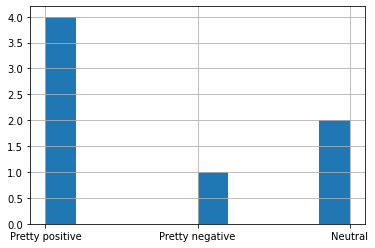

In [10]:
profiled_text_dataframe['sentiment_polarity'].hist()

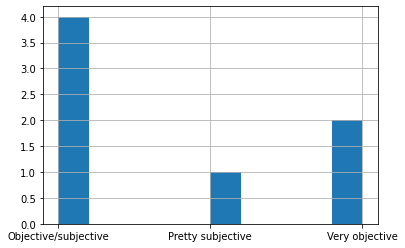

In [11]:
profiled_text_dataframe['sentiment_subjectivity'].hist()

### Spelling quality check

#### The spelling score and spelling quality check is upto 70% accurate, it's using Peter Norvig’s “How to Write a Spelling Corrector".

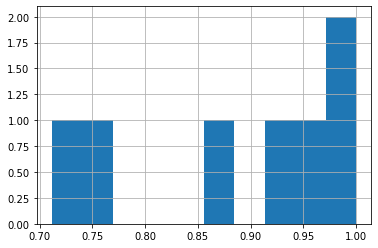

In [12]:
profiled_text_dataframe['spellcheck_score'].hist()

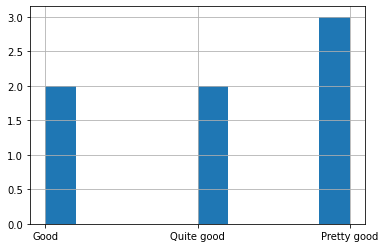

In [13]:
profiled_text_dataframe['spelling_quality'].hist()

### Running describe() on the new NLP profiler generated dataframe

In [14]:
profiled_text_dataframe.describe()

,sentiment_polarity_score,sentiment_subjectivity_score,spellcheck_score,sentences_count,characters_count,spaces_count,words_count,duplicates_count,chars_excl_spaces_count,emoji_count,whole_numbers_count,alpha_numeric_count,non_alpha_numeric_count,punctuations_count,stop_words_count,dates_count
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,7.000000
mean,0.212078,0.404286,0.887087,2.428571,61.285714,9.571429,9.857143,1.000000,51.714286,0.285714,2.142857,47.428571,13.857143,4.00000,3.714286,0.428571
std,0.285829,0.293193,0.118690,0.786796,28.182230,3.909695,4.670067,1.290994,24.560906,0.755929,2.734262,23.971213,4.634241,2.94392,1.889822,0.786796
min,-0.106818,0.000000,0.711513,2.000000,21.000000,5.000000,4.000000,0.000000,16.000000,0.000000,0.000000,13.000000,8.000000,1.00000,1.000000,0.000000
25%,0.000000,0.215000,0.802705,2.000000,49.000000,7.500000,7.000000,0.000000,40.000000,0.000000,0.000000,38.500000,10.500000,1.50000,3.000000,0.000000
50%,0.136364,0.500000,0.923887,2.000000,60.000000,8.000000,9.000000,0.000000,52.000000,0.000000,1.000000,46.000000,14.000000,3.00000,3.000000,0.000000
75%,0.377500,0.575000,0.984401,2.500000,69.000000,11.000000,12.000000,2.000000,59.500000,0.000000,4.000000,52.000000,17.000000,6.50000,4.500000,0.500000
max,0.700000,0.750000,1.000000,4.000000,112.000000,17.000000,18.000000,3.000000,95.000000,2.000000,6.000000,92.000000,20.000000,8.00000,7.000000,2.000000


### Resources

- https://www.kaggle.com/raenish/cheatsheet-text-helper-functions
- https://textblob.readthedocs.io/en/dev/quickstart.html
- [Approaching (Almost) Any NLP Problem on Kaggle](https://www.kaggle.com/abhishek/approaching-almost-any-nlp-problem-on-kaggle)